In [1]:
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

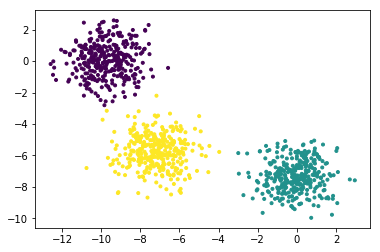

In [2]:
n_samples = 1000
blobs = datasets.make_blobs(n_samples = n_samples,random_state=9)
x,y = blobs
plt.scatter(x[:,0],x[:,1],marker='.',c=y)

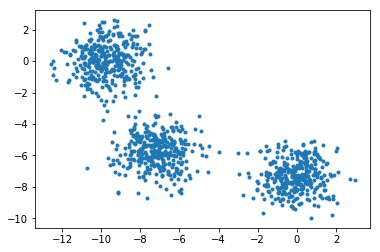

In [3]:
plt.scatter(x[:,0],x[:,1],marker='.')

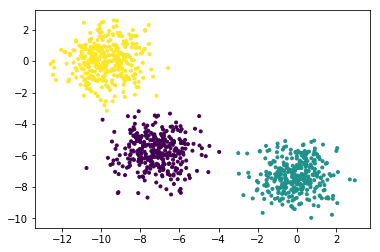

In [4]:
y_kMeans = cluster.KMeans(n_clusters=3).fit_predict(x)
plt.scatter(x[:,0],x[:,1],marker='.',c=y_kMeans)

In [5]:
class KMeans():
    def __init__(self, n_clusters=4):
        self.k = n_clusters

    def fit(self, data):
        n_samples, _ = data.shape

        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)

        old_assigns = None
        n_iters = 0

        while True:
            #E-step
            self.new_assigns = [self.classify(datapoint) for datapoint in data]

            if self.new_assigns == old_assigns:
                print "Training finished after %d iterations!"%(n_iters)
                return
            
            old_assigns = self.new_assigns
            n_iters += 1

            #M-step
            for id_ in range(self.k):
                points_idx = np.where(np.array(self.new_assigns) == id_)
                datapoints = data[points_idx]
                #print type(datapoints)
                self.centers[id_] = datapoints.mean(axis=0)

    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, datapoint):
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)
    
    def plot_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=self.new_assigns)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='b')

Training finished after 4 iterations!


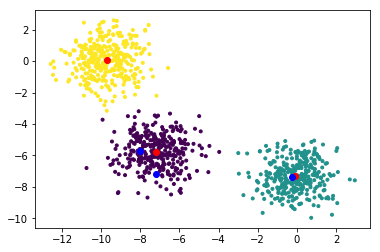

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
kmeans.plot_clusters(x)

Training finished after 33 iterations!


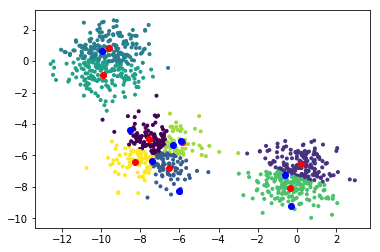

In [7]:
kmeans2 = KMeans(n_clusters=8)
kmeans2.fit(x)
kmeans2.plot_clusters(x)

In [8]:
class KMeans_RPCL():
    def __init__(self, n_clusters=4):
        self.k = n_clusters
        self.alpha = 0.2
        
    def fit(self, data):
        n_samples, _ = data.shape

        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)

        old_assigns = None
        n_iters = 0
      
        while True:
            #E-step：if no data point is distributed to a center, delete the center  
            flag=1
            while flag==1:        
                self.new_assigns = [self.classify(datapoint) for datapoint in data]
                flag=0
                for id_ in range(self.k):
                    points_idx = np.where(np.array(self.new_assigns) == id_)
                    if len(points_idx[0])<0.1*n_samples:
                        self.k-=1
                        self.centers=np.delete(self.centers,id_,axis=0)
                        flag=1
                        break
            
            if self.new_assigns == old_assigns :
                print "Training finished after %d iterations!"%(n_iters)
                return
            
            old_assigns = self.new_assigns
            n_iters += 1

            #M-step: calculate each points' rivals and added the distance of 
                            #center and those points whose rival is the center.
            self.rivals = [self.find_rivals(datapoint) for datapoint in data]
            for id_ in range(self.k):
                points_idx = np.where(np.array(self.new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)
                rivals_idx = np.where(np.array(self.rivals) == id_)
                #print len(rivals_idx[0]),self.centers
                if len(rivals_idx[0])>0:
                    distance_rival = np.sqrt((self.centers[id_]-data[rivals_idx])**2)                   
                    self.centers[id_]+=distance_rival.mean(axis=0)*self.alpha

    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, datapoint):
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)
  
    #calculate the data point's rival point: the second closest point.
    def find_rivals(self, datapoint):
        dists = self.l2_distance(datapoint)
        dists[np.argmin(dists)] = np.nan       
        return np.nanargmin(dists)
    
    def plot_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=self.new_assigns)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='b')

Training finished after 4 iterations!


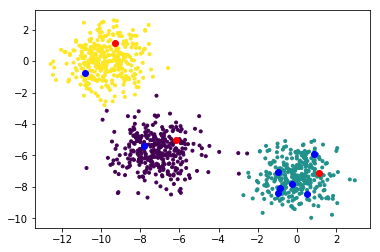

In [78]:
kmeans_rpcl = KMeans_RPCL(n_clusters=8)
kmeans_rpcl.fit(x)
kmeans_rpcl.plot_clusters(x)